<a href="https://colab.research.google.com/github/frankodzia/ai-course-gp/blob/main/klasyfikacja_binarna_cz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

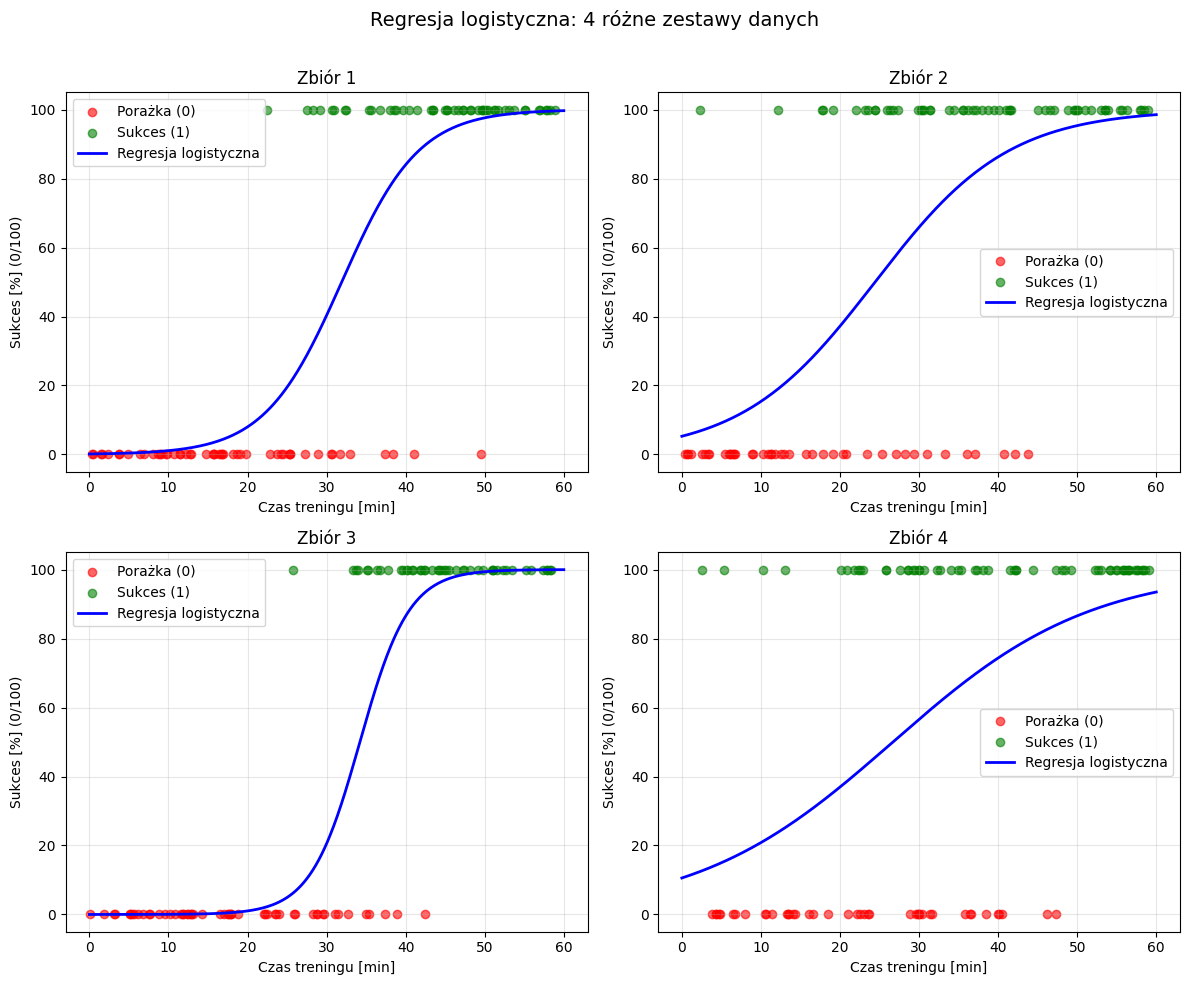

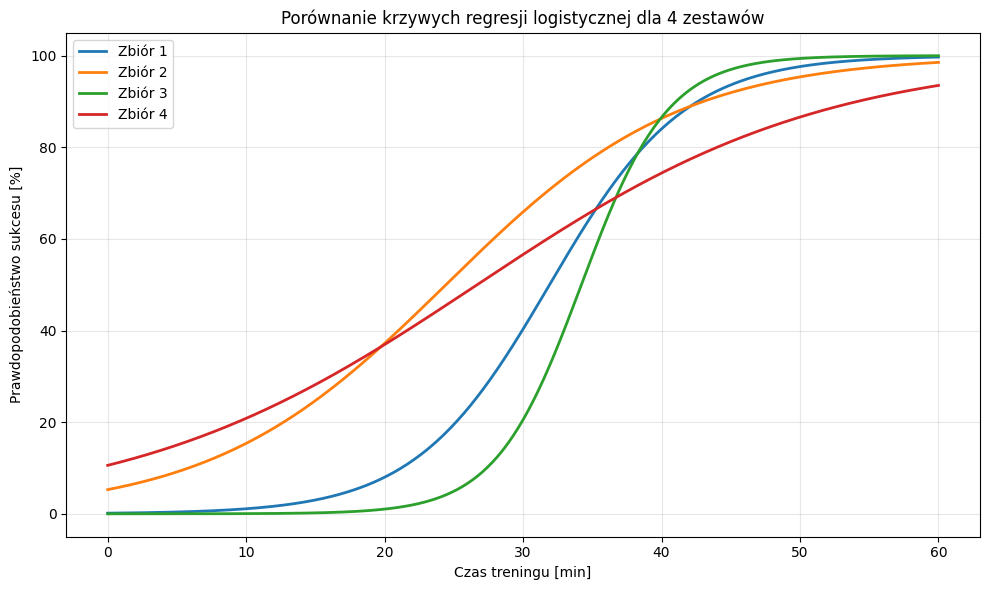


=== Chatbot: Szansa ukończenia obby ===
Najpierw wybierz model, później podawaj czas treningu w minutach.
Wpisz 'back' aby wrócić do wyboru modelu, lub 'q' aby wyjść.

=== Wybierz model (1–4) albo 'q' aby zakończyć ===
1. Zbiór 1
2. Zbiór 2
3. Zbiór 3
4. Zbiór 4
Twój wybór: 3

Wybrano: Zbiór 3
Podaj czas treningu [0–60] (albo 'back' / 'q'): 12
P(ukończenia) ≈ 0.1%  |  przewidywana klasa: 0
Rekomendacja: Masz <40% szans: ćwicz znacznie więcej (np. +20–30 min).


KeyboardInterrupt: Interrupted by user

In [ ]:
#Praca domowa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def generuj_zbior(n, seed, k_true, x0_true):
    los = np.random.default_rng(seed)
    czas = los.uniform(0, 60, n)
    p = 1 / (1 + np.exp(-k_true * (czas - x0_true)))
    y = los.binomial(1, p)
    return czas, y

zbiory = [
    {"n": 100, "seed": 1, "k_true": 0.20, "x0_true": 30, "etykieta": "Zbiór 1"},
    {"n": 100, "seed": 2, "k_true": 0.15, "x0_true": 25, "etykieta": "Zbiór 2"},
    {"n": 100, "seed": 3, "k_true": 0.25, "x0_true": 35, "etykieta": "Zbiór 3"},
    {"n": 100, "seed": 4, "k_true": 0.10, "x0_true": 28, "etykieta": "Zbiór 4"},
]

siatka = np.linspace(0, 60, 500).reshape(-1, 1)

krzywe = []
modele = []
etykiety = []

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, zb in enumerate(zbiory):
    czas, y = generuj_zbior(zb["n"], zb["seed"], zb["k_true"], zb["x0_true"])
    X = czas.reshape(-1, 1)

    model = LogisticRegression(solver="lbfgs", max_iter=1000)
    model.fit(X, y)

    modele.append(model)
    etykiety.append(zb["etykieta"])

    p_hat = model.predict_proba(siatka)[:, 1] * 100
    krzywe.append((p_hat, zb["etykieta"]))

    axs[i].scatter(czas[y == 0], y[y == 0] * 100, c="red", alpha=0.6, label="Porażka (0)")
    axs[i].scatter(czas[y == 1], y[y == 1] * 100, c="green", alpha=0.6, label="Sukces (1)")

    axs[i].plot(siatka, p_hat, "b-", linewidth=2, label="Regresja logistyczna")

    axs[i].set_title(zb["etykieta"])
    axs[i].set_xlabel("Czas treningu [min]")
    axs[i].set_ylabel("Sukces [%] (0/100)")
    axs[i].grid(True, alpha=0.3)
    axs[i].legend()

plt.suptitle("Regresja logistyczna: 4 różne zestawy danych", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


plt.figure(figsize=(10, 6))
for p_hat, ety in krzywe:
    plt.plot(siatka, p_hat, linewidth=2, label=ety)
plt.xlabel("Czas treningu [min]")
plt.ylabel("Prawdopodobieństwo sukcesu [%]")
plt.title("Porównanie krzywych regresji logistycznej dla 4 zestawów")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# -----------------------------
# Praca domowa
# -----------------------------

def rekomendacja(p_proc):
    """Proste progi (w %). Zmień tekst jak chcesz."""
    if p_proc < 40:
        return "Masz <40% szans: ćwicz znacznie więcej (np. +20–30 min)."
    elif p_proc < 60:
        return "40–60%: powinieneś sobie poradzić, ale dorzuć kilka prób."
    elif p_proc < 80:
        return "60–80%: jesteś blisko, utrzymaj regularny trening."
    else:
        return "≥80%: bardzo wysokie szanse, idź po rekord!"

def wybierz_model():
    """Proste menu wyboru jednego modelu."""
    print("\n=== Wybierz model (1–4) albo 'q' aby zakończyć ===")
    for i, nazwa in enumerate(etykiety, start=1):
        print(f"{i}. {nazwa}")

    while True:
        odp = input("Twój wybór: ").strip().lower()
        if odp == "q":
            return None
        if odp in ("1", "2", "3", "4"):
            nr = int(odp) - 1
            if 0 <= nr < len(modele):
                return nr
        print("Wpisz 1, 2, 3, 4 lub 'q'.")

print("\n=== Chatbot: Szansa ukończenia obby ===")
print("Najpierw wybierz model, później podawaj czas treningu w minutach.")
print("Wpisz 'back' aby wrócić do wyboru modelu, lub 'q' aby wyjść.")

while True:
    idx_modelu = wybierz_model()
    if idx_modelu is None:
        print("Koniec. Powodzenia!")
        break

    wybrany = modele[idx_modelu]
    nazwa = etykiety[idx_modelu]
    print(f"\nWybrano: {nazwa}")

    while True:
        tekst = input("Podaj czas treningu [0–60] (albo 'back' / 'q'): ").strip().lower()
        if tekst == "q":
            print("Koniec. Powodzenia!")
            raise SystemExit
        if tekst == "back":
            break

        try:
            t = float(tekst)
        except ValueError:
            print("Podaj liczbę (np. 12.5), albo 'back' / 'q'.")
            continue

        if t < 0 or t > 60:
            print("Czas powinien być w zakresie 0–60 min.")
            continue

        t_arr = np.array([[t]])
        p = wybrany.predict_proba(t_arr)[:, 1][0]
        p_proc = p * 100.0
        klasa = 1 if p >= 0.5 else 0

        print(f"P(ukończenia) ≈ {p_proc:.1f}%  |  przewidywana klasa: {klasa}")
        print("Rekomendacja:", rekomendacja(p_proc))


In [ ]:

# 1) Prawdziwe wyniki: 1 = sukces, 0 = porażka
y_prawda = [
    1,1,1,1,1,1,1,1,1,1,
    0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0
]

# 2) Przewidywania 4 modeli

# Model 1
y_model1 = [
    1,1,1,1,1,1,1,
    0,0,0,
    1,
    0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0
]

# Model 2
y_model2 = [
    1,1,1,1,
    0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0
]

# Model 3
y_model3 = [
    1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
]

# Model 4
y_model4 = [
    1,1,1,1,1,1,1,1,1,
    0,
    1,1,1,1,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
]

# 3) Liczenie metryk
def policz_accuracy(prawda, model):
    poprawne = 0
    for i in range(len(prawda)):
        if prawda[i] == model[i]:
            poprawne += 1
    return poprawne / len(prawda)

def policz_precision(prawda, model):
    tp = fp = 0
    for i in range(len(prawda)):
        if model[i] == 1:
            if prawda[i] == 1: tp += 1
            else:               fp += 1
    if tp + fp == 0: return 0.0
    return tp / (tp + fp)

def policz_recall(prawda, model):
    tp = fn = 0
    for i in range(len(prawda)):
        if prawda[i] == 1:
            if model[i] == 1: tp += 1
            else:             fn += 1
    if tp + fn == 0: return 0.0
    return tp / (tp + fn)

def policz_f1(prawda, model):
    p = policz_precision(prawda, model)
    r = policz_recall(prawda, model)
    if p + r == 0: return 0.0
    return 2 * p * r / (p + r)



# 4) Raport – policz i pokaż wyniki
modele = {
    "Model 1": y_model1,
    "Model 2": y_model2,
    "Model 3": y_model3,
    "Model 4": y_model4,
}

for nazwa, przewidywania in modele.items():
    acc = policz_accuracy(y_prawda, przewidywania)
    pre = policz_precision(y_prawda, przewidywania)
    rec = policz_recall(y_prawda, przewidywania)
    f1  = policz_f1(y_prawda, przewidywania)

    print("="*66)
    print(nazwa)
    print(" Dokładność (accuracy):", round(acc, 3))
    print(" Precyzja (precision): ", round(pre, 3))
    print(" Czułość (recall):     ", round(rec, 3))
    print(" F1-score:             ", round(f1, 3))



Model 1
 Dokładność (accuracy): 0.871
 Precyzja (precision):  0.875
 Czułość (recall):      0.7
 F1-score:              0.778
Model 2
 Dokładność (accuracy): 0.806
 Precyzja (precision):  1.0
 Czułość (recall):      0.4
 F1-score:              0.571
Model 3
 Dokładność (accuracy): 0.806
 Precyzja (precision):  0.625
 Czułość (recall):      1.0
 F1-score:              0.769
Model 4
 Dokładność (accuracy): 0.839
 Precyzja (precision):  0.692
 Czułość (recall):      0.9
 F1-score:              0.783


In [ ]:
def policz_tp_fp_tn_fn(prawda, model):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(prawda)):
        if prawda[i] == 1 and model[i] == 1:
            TP += 1
        elif prawda[i] == 0 and model[i] == 1:
            FP += 1
        elif prawda[i] == 0 and model[i] == 0:
            TN += 1
        elif prawda[i] == 1 and model[i] == 0:
            FN += 1
    return TP, FP, TN, FN

def licz_accuracy2(TP, FP, TN, FN):
    return (TP + TN) / (TP + FP + TN + FN)

def licz_precision2(TP, FP, TN, FN):
    if (TP + FP) == 0:
        return 0.0
    return TP / (TP + FP)

def licz_recall2(TP, FP, TN, FN):
    if (TP + FN) == 0:
        return 0.0
    return TP / (TP + FN)

def licz_f12(TP, FP, TN, FN):
    P = licz_precision2(TP, FP, TN, FN)
    R = licz_recall2(TP, FP, TN, FN)
    if (P + R) == 0:
        return 0.0
    return 2 * P * R / (P + R)


for nazwa, przewidywania in modele.items():
    TP, FP, TN, FN = policz_tp_fp_tn_fn(y_prawda, przewidywania)
    A = licz_accuracy2(TP, FP, TN, FN)
    P = licz_precision2(TP, FP, TN, FN)
    R = licz_recall2(TP, FP, TN, FN)
    F1 = licz_f12(TP, FP, TN, FN)

    print("="*50)
    print(nazwa)
    print("Accuracy :", round(A, 3))
    print("Precision:", round(P, 3))
    print("Recall   :", round(R, 3))
    print("F1-score :", round(F1, 3))

Model 1
Accuracy : 0.871
Precision: 0.875
Recall   : 0.7
F1-score : 0.778
Model 2
Accuracy : 0.806
Precision: 1.0
Recall   : 0.4
F1-score : 0.571
Model 3
Accuracy : 0.806
Precision: 0.625
Recall   : 1.0
F1-score : 0.769
Model 4
Accuracy : 0.839
Precision: 0.692
Recall   : 0.9
F1-score : 0.783
